# The Support Vector Machine and Kernel Mappings


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

import HelpfulFunctions as hp

## Understanding the Geometry of the SVM

In [4]:
from sklearn.svm import SVC

In [5]:
def ClusterSVM(X,y,n,seed,cval):

    clf = SVC(kernel='linear', C=cval)
    clf.fit(X,y)
    
#    print('clf.coef_=',clf.coef_)
#    print('clf.intercept_=',clf.intercept_)
#    print('clf.supportVectors=',clf.support_vectors_)
    
    xx = np.linspace(np.min(X[:,0]),np.max(X[:,0]))

    w = clf.coef_[0]
    a = -w[0]/w[1]
    b = -clf.intercept_[0] / w[1]

    yy = a * xx + b
    yyp = a * xx + b + 1/w[1]
    yym = a * xx + b - 1/w[1]

    plt.figure(figsize=(8,8))
    plt.plot(xx, yy,linestyle='--',c='k')
    plt.plot(xx, yyp,linestyle='-',c='k')
    plt.plot(xx, yym,linestyle='-',c='k')
    plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.coolwarm)    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')

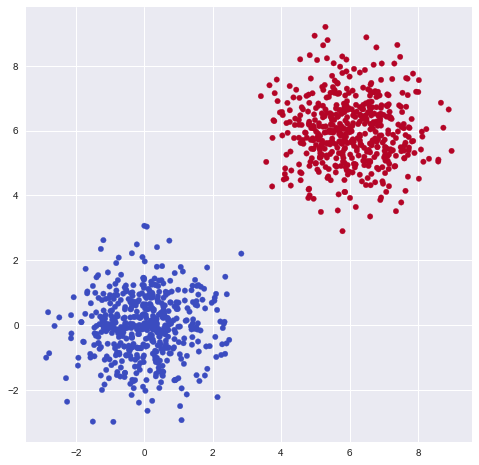

In [6]:
# we create 1000 separable points using the special make blobs function
from sklearn.datasets import make_blobs

plt.figure(figsize=(8,8))
X, y = make_blobs(n_samples=1000, centers = [[0,0],[6,6]], random_state=1911)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

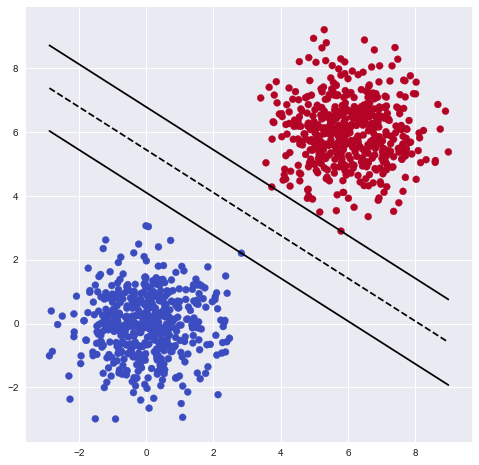

In [7]:
ClusterSVM(X,y,100,997,10000)

## SVM when the Data is not Linearly Separable

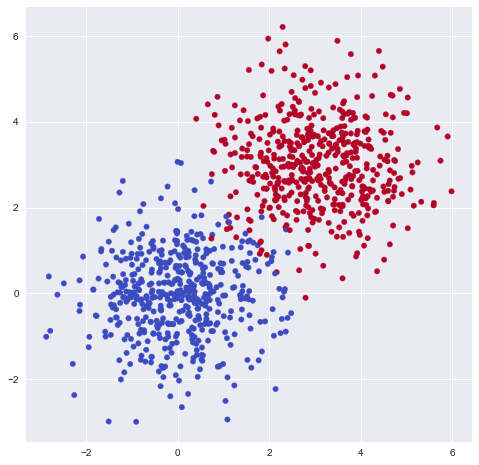

In [8]:
# we create 1000 separable points using the special make blobs function
from sklearn.datasets import make_blobs

plt.figure(figsize=(8,8))
X, y = make_blobs(n_samples=1000, centers = [[0,0],[3,3]], random_state=1911)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)

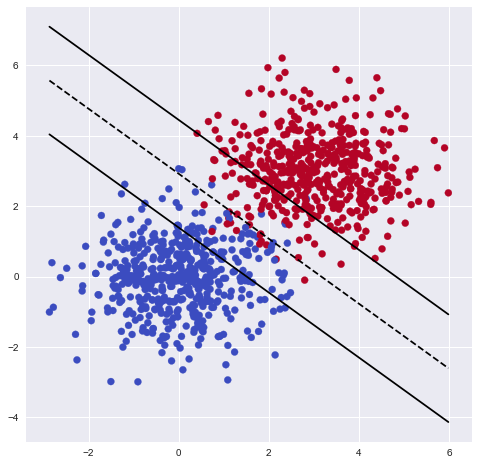

In [9]:
ClusterSVM(X,y,100,997,0.01)

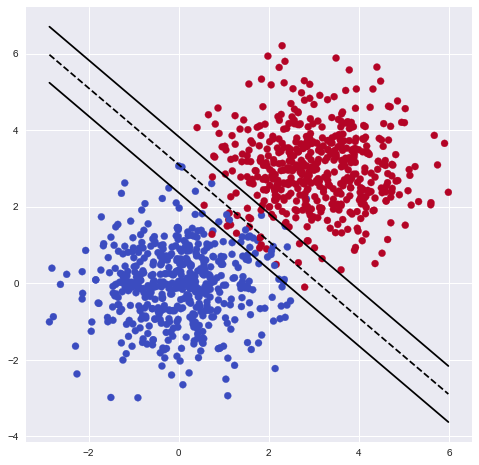

In [10]:
ClusterSVM(X,y,100,997,1.0)

## Loading IRIS Dataset

In [11]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
iris = load_iris()

In [13]:
X = iris['data']

In [14]:
df = pd.DataFrame(X)

In [15]:
df.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']

In [16]:
y = iris['target']

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


### Linear Kernels

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C=1000)

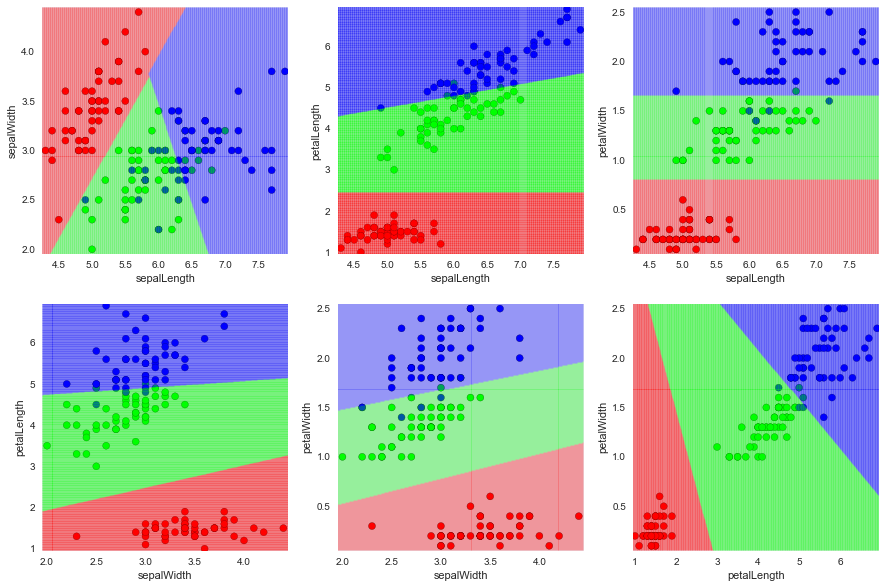

In [20]:
import HelpfulFunctions as hp
plt.figure(figsize=(15,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris['target']
    featureX = df.columns[pair[0]]
    featureY = df.columns[pair[1]]
    clf.fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    hp.featureSpacePlot(featureX,featureY,df,y,clf,plt)

### Radial Basis Functions

In [21]:
# fit the model using the Radial Basis Function kernel, don't regularize for illustration purposes
clf = SVC(kernel='rbf', gamma=5, C=2)

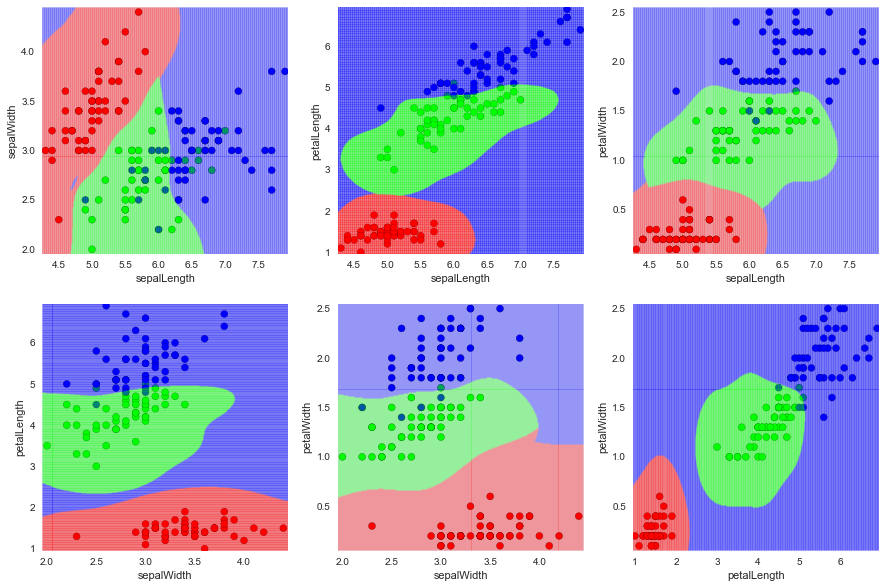

In [22]:
import HelpfulFunctions as hp
plt.figure(figsize=(15,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris['target']
    featureX = df.columns[pair[0]]
    featureY = df.columns[pair[1]]
    clf.fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    hp.featureSpacePlot(featureX,featureY,df,y,clf,plt)

### Polynomial Kernel

In [23]:
clf = SVC(kernel='poly', gamma = 2)

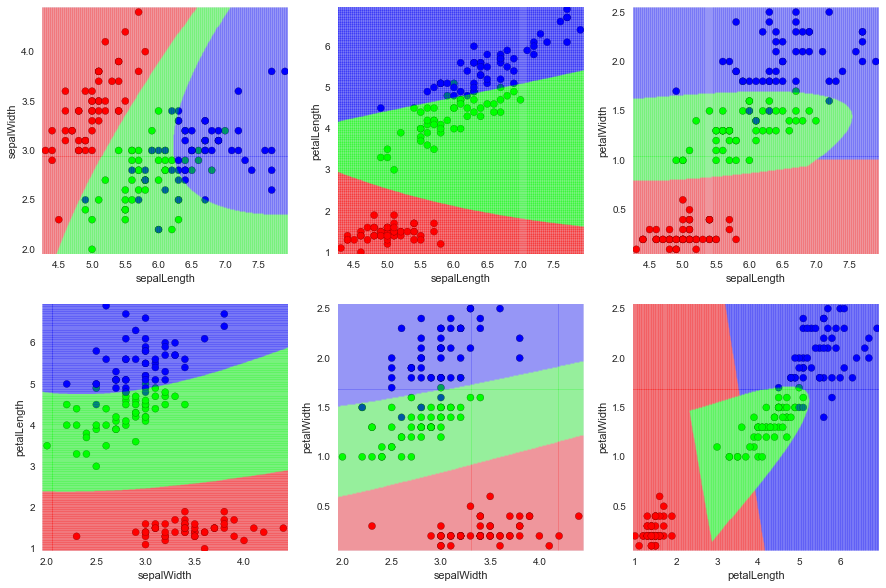

In [24]:
plt.figure(figsize=(15,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    
    X = iris.data[:, pair]
    y = iris['target']
    featureX = df.columns[pair[0]]
    featureY = df.columns[pair[1]]
    clf.fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    hp.featureSpacePlot(featureX,featureY,df,y,clf,plt)    